<a href="https://colab.research.google.com/github/shubh4866/HOTEL_BOOKING_ANALYSIS-/blob/main/Copy_of_Individual_Final_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [ ]:
# linking drive for dataset 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing dataset
path = '/content/drive/MyDrive/EDA/Hotel Bookings.csv'
df = pd.read_csv(path)


In [ ]:
# top 3 rows of the dataset
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [ ]:
# columns and row count 
df.shape

(119390, 32)

In [ ]:
# columns names 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# statistics information of numerical columns from the DataFrame
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# total number of missing value in the dataframe
missing_value = sum(pd.to_numeric(df.isnull().sum()))
print(missing_value)


129425


# **<font color=Blue> Cleaning the Dataframe </font>**

In [ ]:
# null values for each column
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# columns that containg null values 
df[df.columns[df.isnull().any()]].isnull().sum()

children         4
country        488
agent        16340
company     112593
dtype: int64

In [ ]:
miss_columns = df.isna().any()[lambda x: x].index.tolist()
miss_columns = df[miss_columns]
miss_columns.head(2)


,children,country,agent,company
0,0.0,PRT,NaN,NaN
1,0.0,PRT,NaN,NaN


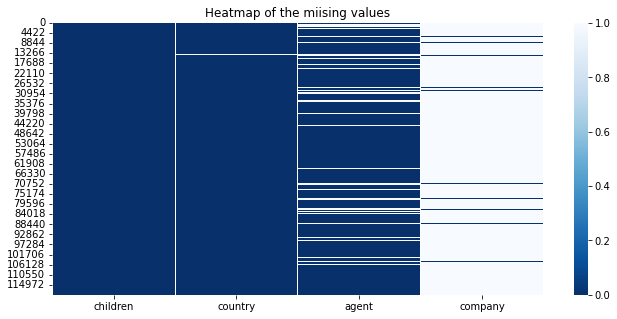

In [ ]:
#Heatmap of columns which have most of the miising values
plt.figure(figsize = (11,5))
sns.heatmap(miss_columns.isnull(), cbar=True,cmap="Blues_r")
plt.title("Heatmap of the miising values")
plt.show()

In [ ]:
# dropping the columns which have most of the null values 
df=df.drop(['agent','company'],axis=1)

In [ ]:
# filling 0 in null values 
df = df.fillna(0)
# replacing 0 in country columns ( categorical column)
df.country = df.country.replace(0, "undefined")

In [ ]:
# checking columns that containg null values 
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

# <font color =Red > As we can see we dont have any null values in our Dataframe 


# <font color= Green > EXPLORATORY DATA ANALYSIS

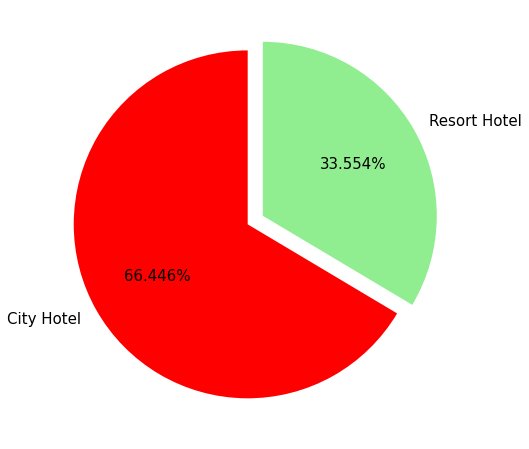

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8
# Indexing labels. tolist() #will convert the index to list for easy manipulation
labels = df['hotel'].value_counts().index.tolist()
# Converting value counts to list
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.1)
colors = ['red', 'lightgreen']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.3f%%',startangle=90, textprops={'fontsize': 15})
plt.show()

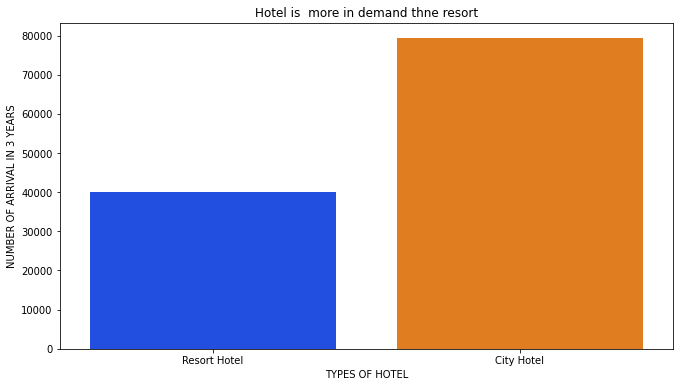

In [ ]:
# HOTEL WAS MORE ENGAGING AND IN DEMAND IN 3 YEARS
plt.figure(figsize=(11,6))
sns.countplot('hotel', data= df, palette="bright")
plt.xlabel("TYPES OF HOTEL")
plt.ylabel("NUMBER OF ARRIVAL IN 3 YEARS")
plt.title("Hotel is  more in demand thne resort")
plt.show()

##<font color =green> -- As we can see from above pie chart more then 66% people stick with city hotel as it is cheaper then resort hotel.</font> 

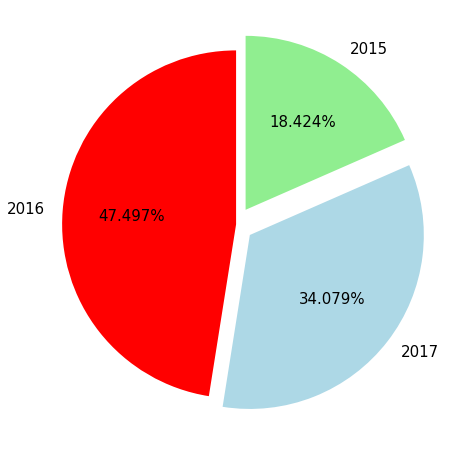

In [ ]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8
# Indexing labels. tolist() #will convert the index to list for easy manipulation
labels = df['arrival_date_year'].value_counts().index.tolist()
# Converting value counts to list
sizes = df['arrival_date_year'].value_counts().tolist()
explode = (0, 0.1,0.1)
colors = ['red','lightblue', 'lightgreen']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.3f%%',startangle=90, textprops={'fontsize': 15})
plt.show()

## <font color =Grenn> As we an see 2016 is the most profitable year

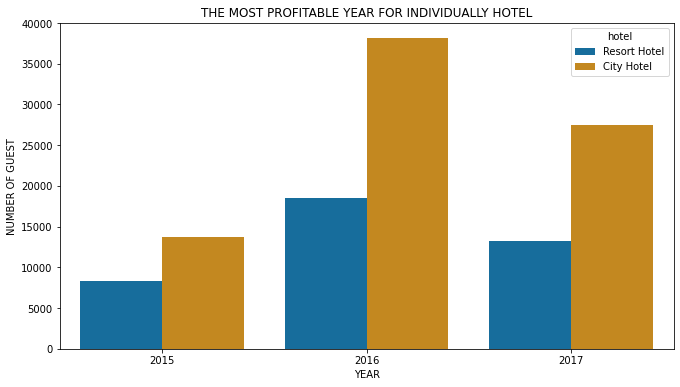

In [ ]:
# Profitable year for city and resort hotels
plt.figure(figsize=(11,6))
sns.countplot('arrival_date_year', hue = 'hotel', data= df, palette="colorblind")
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF GUEST")
plt.title("THE MOST PROFITABLE YEAR FOR INDIVIDUALLY HOTEL")
plt.show()


<font color=red>**--> ALL 3 YEARS CITY HOTEL HAVE MADE MORE PROFIT THAN RESORT HOTEL**

<font color=red>**--> 2016 IS THE MOST PROFITABLE FOR BOTH OF THE HOTEL**

<font color=red>**--> ALL 3 YEARS CITY HOTEL HAVE MORE NUMBER OF GUEST THAN RESORT HOTEL**
</font>

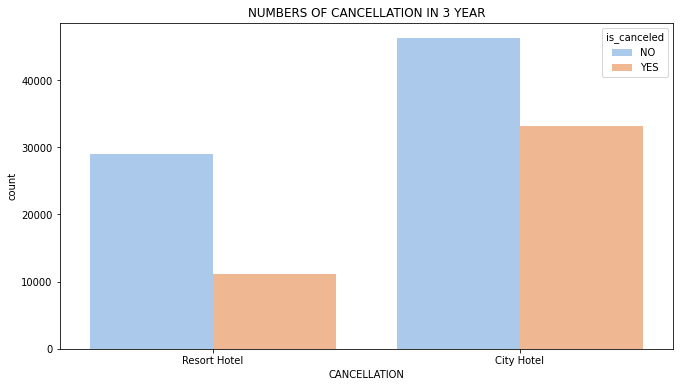

In [ ]:
# cancellattion of booking in 3 years
df2 = df.copy() # creating copy of df
df2["is_canceled"] = df2.is_canceled.replace([0,1],["NO","YES"])
plt.figure(figsize=(11,6))
sns.countplot("hotel", hue= "is_canceled" , data = df2, palette="pastel")
plt.xlabel("CANCELLATION")
plt.title("NUMBERS OF CANCELLATION IN 3 YEAR")
plt.show()

**<font color = red>--> NUMBER OF BOOKING CANCELLATION IS MORE THAN 50% OF TOTAL BOOKING**

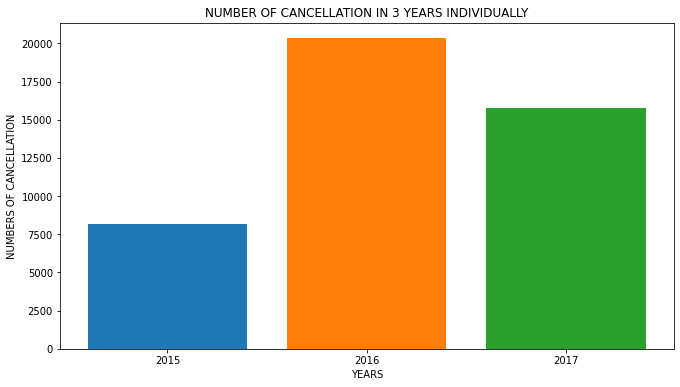

In [ ]:
# CANCELLATION OF BOOKING IN 3 YEARS INDIVIDUALLY
x = ["2015", "2016", "2017"]
y = []
for i in x:
  y.append(df[df["arrival_date_year"] == int(i)][df[df["arrival_date_year"] == int(i)]["is_canceled"] == 1]["is_canceled"].count())
plt.figure(figsize=(11,6))
plt.bar(x,y, color = sns.color_palette())
plt.xlabel("YEARS")
plt.ylabel("NUMBERS OF CANCELLATION")
plt.title("NUMBER OF CANCELLATION IN 3 YEARS INDIVIDUALLY")
plt.show()

<font color = green >**-->2016 HAS THE HIGHEST NUMBERS OF CANCELLATION IN 3 YEARS**